In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\GREAT LAKES\back to studies\capstone\Customer+Churn+data.csv')

In [11]:
df

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,154,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,227,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,180,Computer


In [12]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [13]:
#Feature Removal
df=df.drop(["AccountID"],axis=1)


In [14]:
df.shape

(11260, 18)

In [15]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158,38,1,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148,7,4,4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11144.0,NaN,NaN,NaN,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [17]:
df.duplicated().sum()

259

In [18]:
#Feature replacement
df["Gender"] = df["Gender"].replace("M", 'Male')
df["Gender"] = df["Gender"].replace("F", 'Female')

df["account_segment"] = df["account_segment"].replace("Regular +","Regular Plus")
df["account_segment"] = df["account_segment"].replace("Super +","Super Plus")

In [19]:
len(df)

11260

In [20]:
#Check Data Balancing
df["Churn"] = df["Churn"].astype("int")
df['Churn'].value_counts(1)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

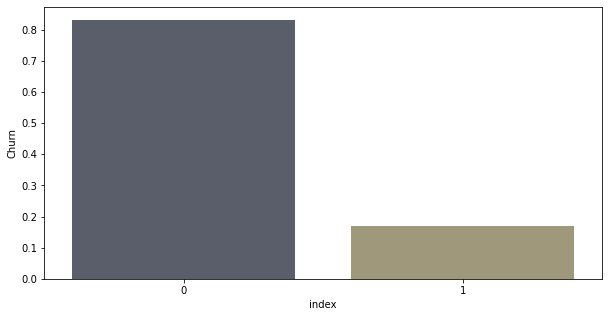

In [21]:

xx=df['Churn'].value_counts(1).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="index",y="Churn",data=xx,palette="cividis");
plt.show()

In [22]:
df.isna().sum().sort_values(ascending=False)/len(df)

cashback                   0.041829
Day_Since_CC_connect       0.031705
Complain_ly                0.031705
Login_device               0.019627
Marital_Status             0.018828
CC_Agent_Score             0.010302
Account_user_count         0.009947
City_Tier                  0.009947
Payment                    0.009680
Gender                     0.009591
Tenure                     0.009059
rev_per_month              0.009059
CC_Contacted_LY            0.009059
Service_Score              0.008703
account_segment            0.008615
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Churn                      0.000000
dtype: float64

missing vale 
mv>2% <10 % impute by mode

In [23]:
# Replacing the merical values and missing value treatment

df["Tenure"] = df["Tenure"].replace("#",0)
df["Tenure"]=df["Tenure"].replace(np.nan,0)
df=df.astype({"Tenure":"int"})
#df["Tenure"] = df["Tenure"].astype(str).astype(int)
#df['Tenure'] = pd.to_numeric(df['Tenure'])
#df['Tenure'].astype(float).astype('Int64')
#df = df.astype({"Tenure": int})

df['Tenure'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]',
value=r'') 
df['Tenure'] = df['Tenure'].astype(float)


df["CC_Contacted_LY"]=df["CC_Contacted_LY"].replace(np.nan,0)
df=df.astype({"CC_Contacted_LY":"int"})
#df['CC_Contacted_LY'] = pd.to_numeric(df['CC_Contacted_LY'])

df["rev_per_month"]=df["rev_per_month"].replace("+",0)
df["rev_per_month"]=df["rev_per_month"].replace(np.nan,0)
df=df.astype({"rev_per_month":"int"})
#df['rev_per_month'] = pd.to_numeric(df['rev_per_month'])

df["rev_growth_yoy"]=df["rev_growth_yoy"].replace("$",0)
df[" rev_growth_yoy"]=df["rev_growth_yoy"].replace(np.nan,0)
df=df.astype({"rev_growth_yoy":"int"})
#df=df.astype({"rev_growth_yoy":"int"})

df['rev_growth_yoy'] = pd.to_numeric(df['rev_growth_yoy'])

df["coupon_used_for_payment"]=df["coupon_used_for_payment"].replace("#",0)
df["coupon_used_for_payment"]=df["coupon_used_for_payment"].replace("$",0)
df["coupon_used_for_payment"]=df["coupon_used_for_payment"].replace("*",0)
df[" coupon_used_for_payment"]=df["coupon_used_for_payment"].replace(np.nan,0)

df["Day_Since_CC_connect"]=df["Day_Since_CC_connect"].replace("$",0)
#df['Day_Since_CC_connect'] = pd.to_numeric(df['Day_Since_CC_connect'])

df["cashback"]=df["cashback"].replace("$",0)


In [24]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median(), inplace=True)
df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median(), inplace=True)
df['rev_per_month'].fillna(df['rev_per_month'].median(), inplace=True)
df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median(), inplace=True)
df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median(), inplace=True)

In [25]:
# Removing special char in catgorical value
df.Account_user_count=df.Account_user_count.replace(to_replace='@',value=df['Account_user_count'].mode()[0])
#df.Account_user_count=df.Account_user_count.replace(to_replace="",value=0)
df.Login_device=df.Login_device.replace(to_replace="&&&&",value=df['Login_device'].mode()[0])

In [26]:
df['account_segment']=df['account_segment'].fillna(df['account_segment'].mode()[0])

In [27]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['account_segment'].fillna(df['account_segment'].mode()[0], inplace=True) 
df['Account_user_count'].fillna(df['Account_user_count'].mode()[0], inplace=True) 
df['Login_device'].fillna(df['Login_device'].mode()[0], inplace=True) 
df['City_Tier'].fillna(df['City_Tier'].mode()[0], inplace=True)
df['Service_Score'].fillna(df['Service_Score'].mode()[0],inplace=True)
df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mode()[0],inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0],inplace=True)
df['Payment'].fillna(df['Payment'].mode()[0],inplace=True)
df['Complain_ly'].fillna(df['Complain_ly'].mode()[0],inplace=True)
df['Login_device'].fillna(df['Login_device'].mode()[0],inplace=True)
df['cashback'].fillna(df['cashback'].mode()[0],inplace=True)

cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean)

In [28]:
missing_count_df = df.isnull().sum()
value_count_df = df.isnull().count()
missing_percentage_df = round(missing_count_df/value_count_df*100,2)

<Figure size 720x360 with 0 Axes>

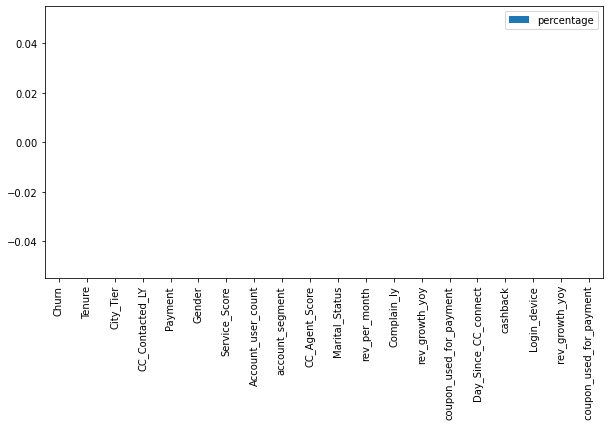

In [29]:
plt.figure(figsize=(10,5))
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df })
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(10,5))
plt.show()

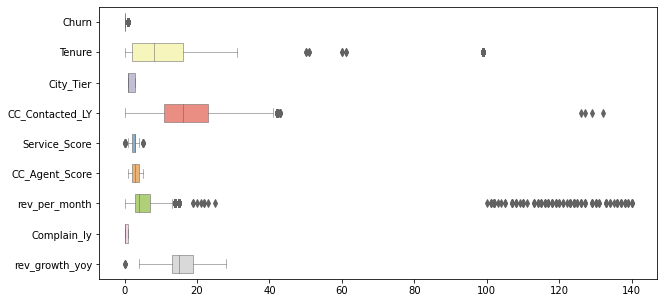

In [30]:
#Outliner check Before IQR Treatment
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

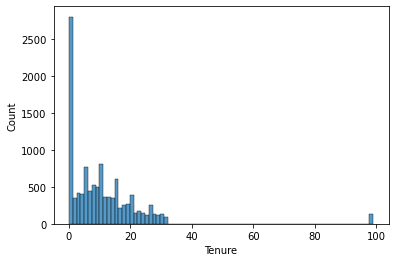

In [31]:
#Univariate analysis-Tenure
sns.histplot(df["Tenure"])

C:\Users\Dell\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


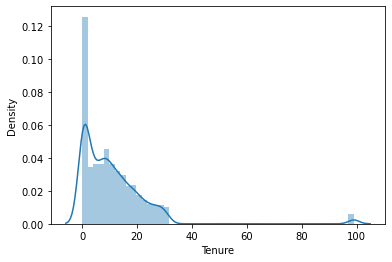

In [32]:
sns.distplot(df['Tenure']);

Tenure_range = pd.cut(df["Tenure"], 
                     bins=[0, 20, 40, 60, 80, 100, 120, 140], 
                     labels=["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140"])

df["Tenure_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Tenure in each Tenure Range")
plt.show()

In [33]:
df['Tenure'].describe(include="all").T

count    11260.000000
mean        10.811634
std         12.844640
min          0.000000
25%          2.000000
50%          8.000000
75%         16.000000
max         99.000000
Name: Tenure, dtype: float64

<AxesSubplot:>

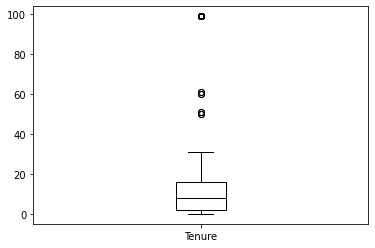

In [34]:
import matplotlib.pyplot as plt

df.boxplot(column=['Tenure'], grid=False, color='black')

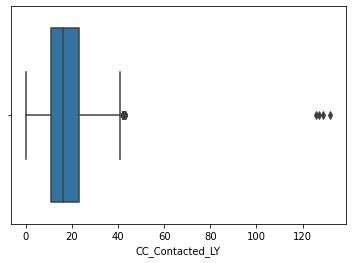

In [35]:
sns.boxplot(x="CC_Contacted_LY",data=df);

In [36]:
df['CC_Contacted_LY'].describe(include="all").T

count    11260.000000
mean        17.705240
std          8.974194
min          0.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64

<AxesSubplot:xlabel='account_segment', ylabel='Count'>

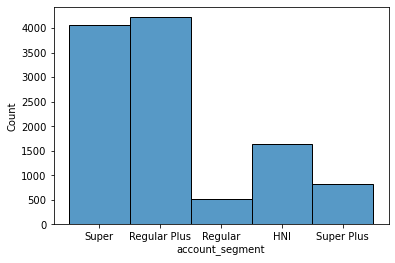

In [37]:
sns.histplot(df["account_segment"])

In [38]:
df['rev_per_month'].describe(include="all").T

count    11260.000000
mean         5.915631
std         11.598273
min          0.000000
25%          3.000000
50%          4.000000
75%          7.000000
max        140.000000
Name: rev_per_month, dtype: float64

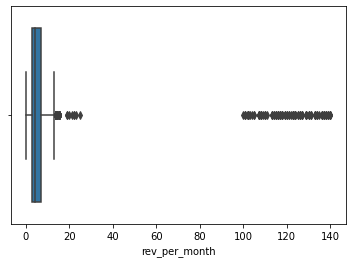

In [39]:
sns.boxplot(x="rev_per_month",data=df);

In [40]:
df['rev_growth_yoy'].describe(include="all").T

count    11260.000000
mean        16.189076
std          3.766505
min          0.000000
25%         13.000000
50%         15.000000
75%         19.000000
max         28.000000
Name: rev_growth_yoy, dtype: float64

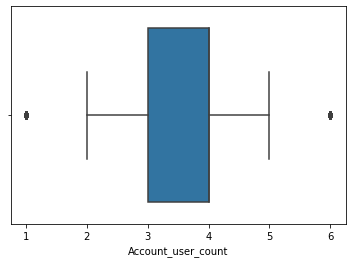

In [41]:
df['Account_user_count'] = df['Account_user_count'].astype('float')
sns.boxplot(x="Account_user_count",data=df);

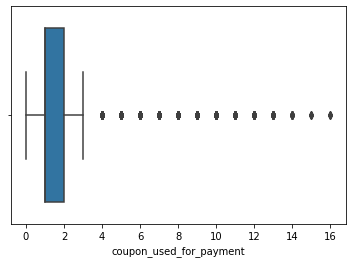

In [42]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype('float')
sns.boxplot(x="coupon_used_for_payment",data=df);

In [43]:

df["coupon_used_for_payment"] = df["coupon_used_for_payment"].astype("int")
df['coupon_used_for_payment'].describe(include="all").T

count    11260.000000
mean         1.790142
std          1.969505
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: coupon_used_for_payment, dtype: float64

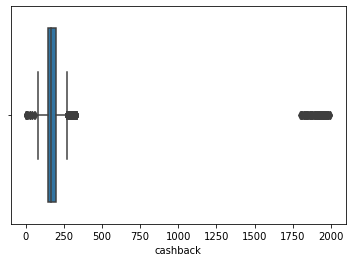

In [44]:
df['cashback'] = df['cashback'].astype('int')
sns.boxplot(x="cashback",data=df);

In [45]:

df['cashback'].describe(include="all").T

count    11260.000000
mean       194.350178
std        175.107143
min          0.000000
25%        148.000000
50%        163.000000
75%        197.000000
max       1997.000000
Name: cashback, dtype: float64

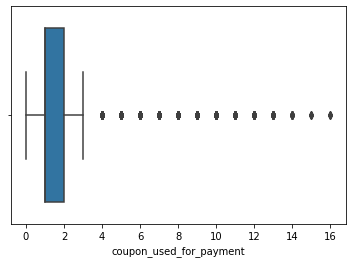

In [46]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype('float')
sns.boxplot(x="coupon_used_for_payment",data=df);

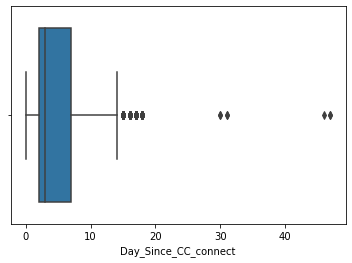

In [47]:

df["Day_Since_CC_connect"] = df["Day_Since_CC_connect"].astype("int")
sns.boxplot(x="Day_Since_CC_connect",data=df);

In [48]:
df['Day_Since_CC_connect'].describe(include="all").T

count    11260.000000
mean         4.580995
std          3.649867
min          0.000000
25%          2.000000
50%          3.000000
75%          7.000000
max         47.000000
Name: Day_Since_CC_connect, dtype: float64

<AxesSubplot:xlabel='coupon_used_for_payment', ylabel='count'>

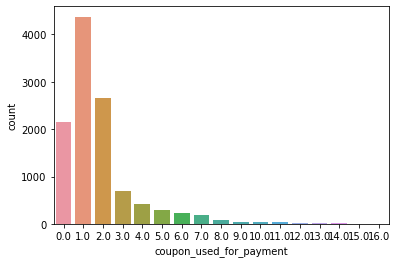

In [49]:
sns.countplot(x='coupon_used_for_payment', data=df)

In [50]:
# BAR plot

<AxesSubplot:xlabel='Gender', ylabel='count'>

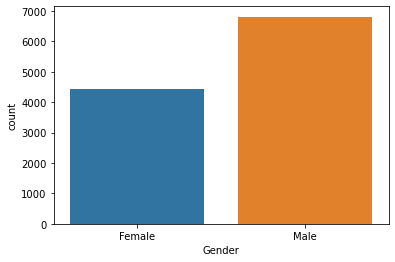

In [51]:
sns.countplot(x="Gender",data=df)

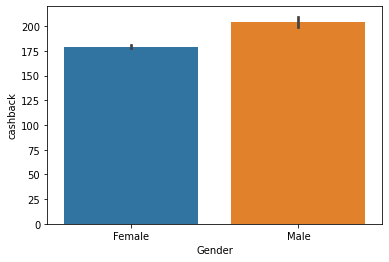

In [52]:
df['cashback'].astype(float)
sns.barplot(x="Gender",y="cashback",data=df)
plt.show()

<AxesSubplot:xlabel='Payment', ylabel='count'>

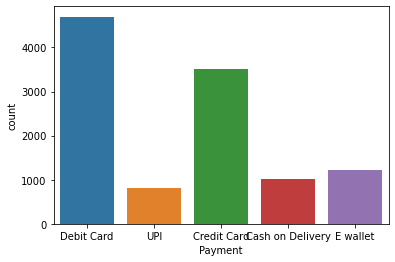

In [53]:
sns.countplot(x="Payment",data=df)

<AxesSubplot:xlabel='City_Tier', ylabel='count'>

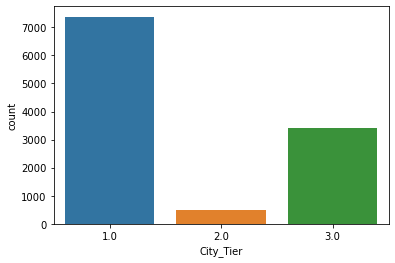

In [54]:
sns.countplot(x="City_Tier",data=df)

<AxesSubplot:xlabel='Service_Score', ylabel='count'>

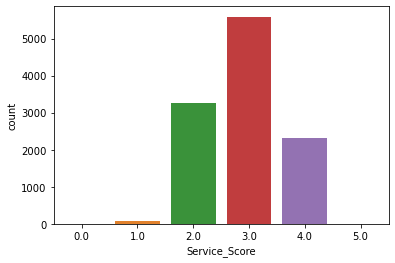

In [55]:
sns.countplot(x="Service_Score",data=df)

<AxesSubplot:xlabel='account_segment', ylabel='count'>

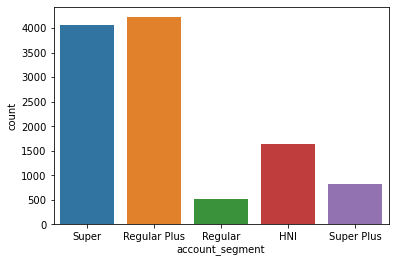

In [56]:
sns.countplot(x="account_segment",data=df)

In [57]:
#Bivarate

<AxesSubplot:xlabel='Churn', ylabel='Tenure'>

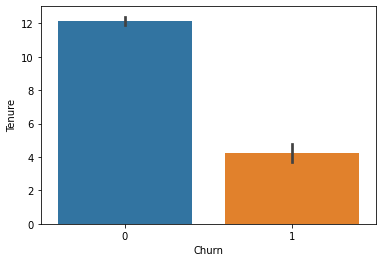

In [58]:
sns.barplot(x="Churn",y="Tenure",data =df)

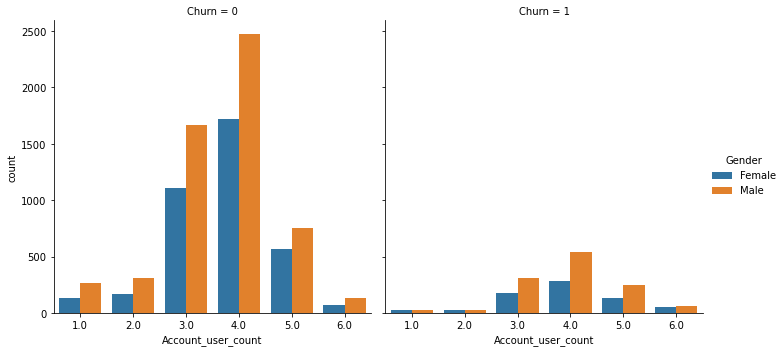

In [59]:
df=df.astype({"Churn":"int"})
plt.rcParams["figure.figsize"] = (20,10)
sns.catplot(x='Account_user_count', col='Churn',hue="Gender", kind='count', data=df);
plt.show()

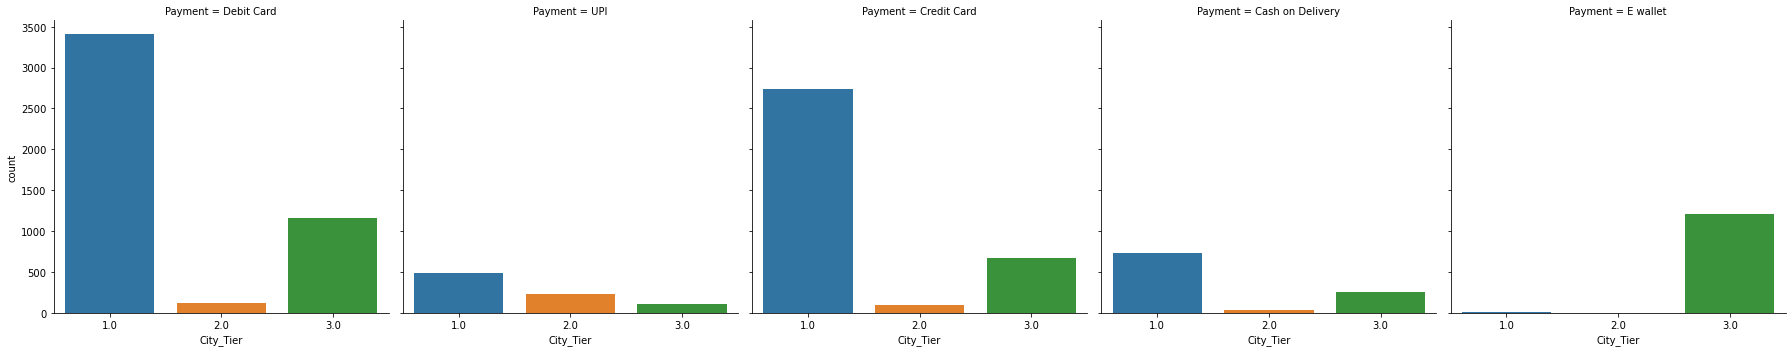

In [60]:
sns.catplot(x='City_Tier', col='Payment', kind='count', data=df);
plt.show()

In [61]:
#sns.barplot(x=df.Account_user_count,y=df.account_segment, hue='Churn', data=df)
#sns.catplot(x='account_segment', col='Account_user_count',hue="Churn", kind='count', data=df);
#sns.catplot(x='account_segment', col='Churn',hue="Gender", kind='count', data=df);

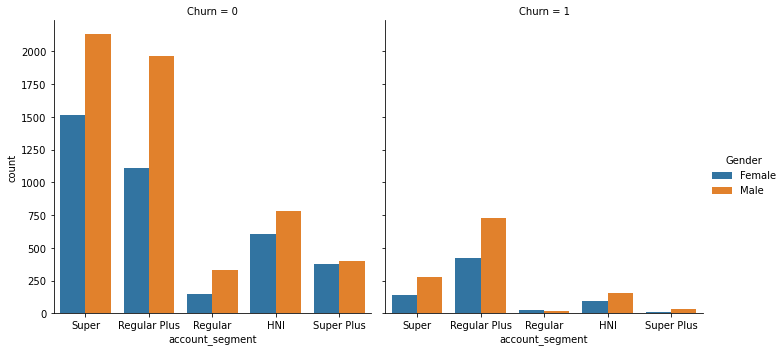

In [62]:
sns.catplot(x='account_segment', col='Churn',hue='Gender', kind='count', data=df);
plt.show()

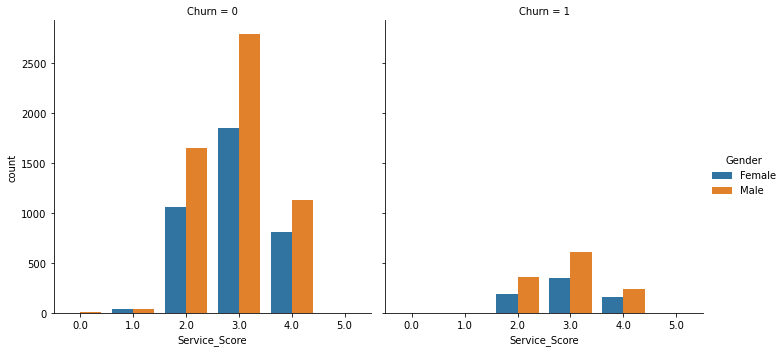

In [63]:
sns.catplot(x='Service_Score', col='Churn',hue='Gender', kind='count', data=df);
plt.show()

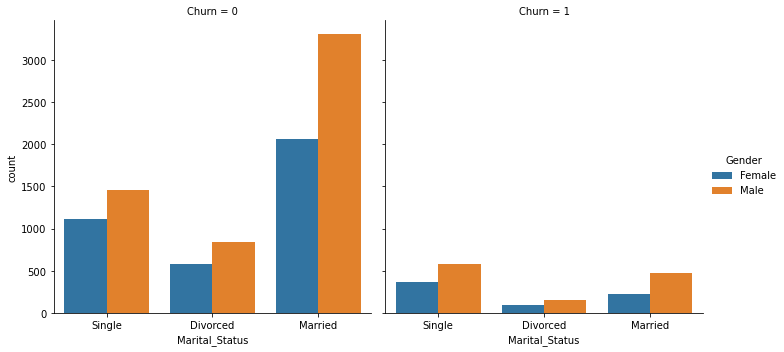

In [64]:
sns.catplot(x='Marital_Status', col='Churn',hue='Gender', kind='count', data=df);
plt.show()

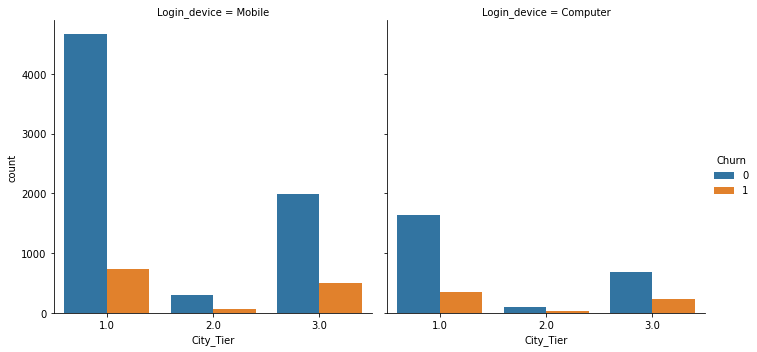

In [65]:
sns.catplot(x='City_Tier', col='Login_device',hue='Churn', kind='count', data=df);
plt.show()

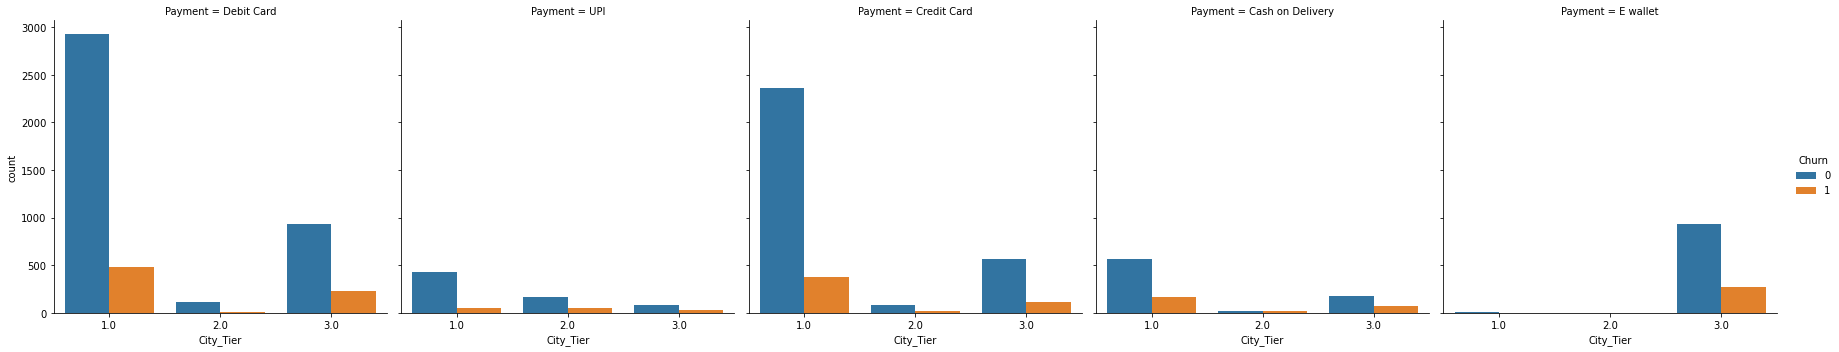

In [66]:
sns.catplot(x='City_Tier', col='Payment',hue='Churn', kind='count', data=df);
plt.show()

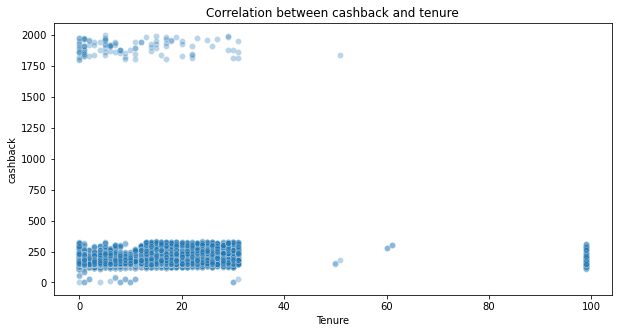

In [67]:
from scipy import stats
plt.figure(figsize=(10,5))
sns.scatterplot(x="Tenure", y="cashback", data=df, alpha=0.3)
plt.title("Correlation between cashback and tenure")
plt.show()

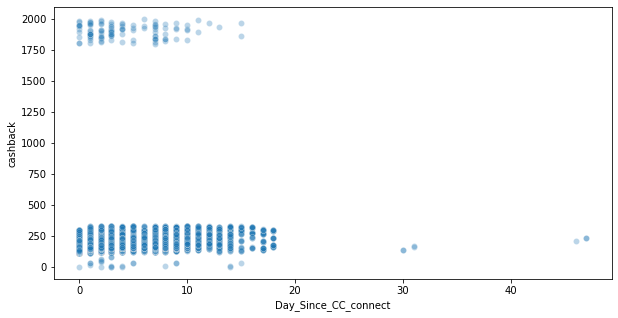

In [68]:
plt.figure(figsize=(10,5))
df=df.astype({"Day_Since_CC_connect":"int"})
sns.scatterplot(x="Day_Since_CC_connect", y="cashback", data=df, alpha=0.3)
plt.show()

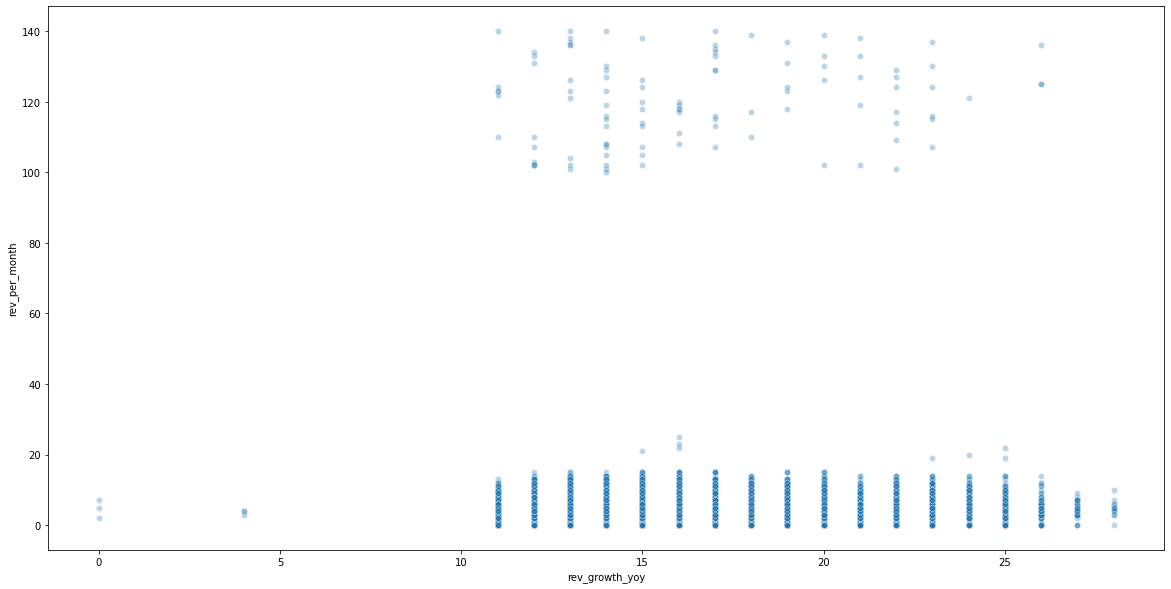

In [69]:

sns.scatterplot(x="rev_growth_yoy", y="rev_per_month", data=df, alpha=0.3)
plt.show()

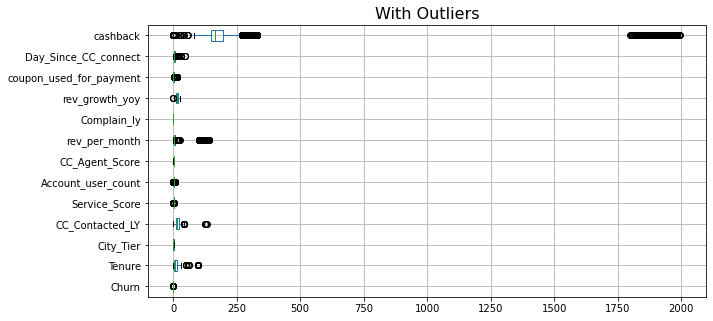

In [70]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,5))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16) 
plt.show()


In [71]:

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [72]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column]) 
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

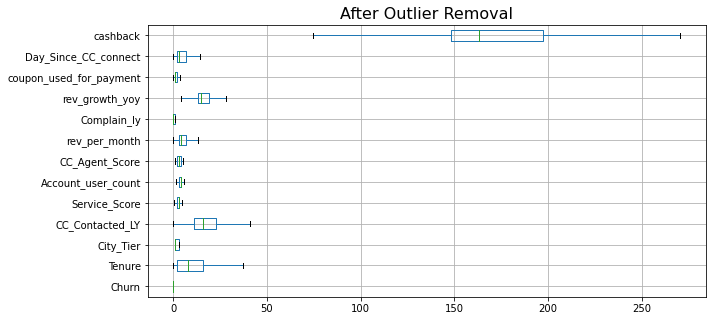

In [73]:
plt.figure(figsize=(10,5))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

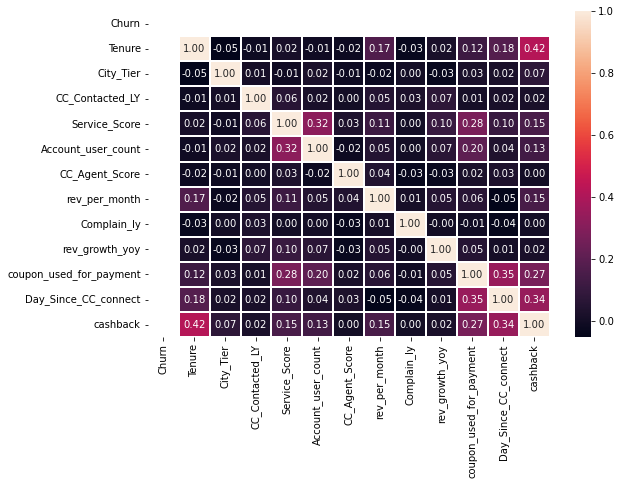

In [74]:

corr = df[cont].corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [75]:
dfCopy = df.copy()


In [76]:
dfCopy.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,rev_growth_yoy,coupon_used_for_payment
0,0.0,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,160.0,Mobile,11,1
1,0.0,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,121.0,Mobile,15,0
2,0.0,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,152.0,Mobile,14,0
3,0.0,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.0,Mobile,23,0
4,0.0,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,130.0,Mobile,11,1


In [77]:
#Converting all objects to categorical codes:Label encoding
dfCopy ['Payment']=np.where(dfCopy ['Payment'] =='Cash on Delivery', '1', dfCopy ['Payment']) 
dfCopy ['Payment']=np.where(dfCopy ['Payment'] =='Credit Card', '2', dfCopy ['Payment']) 
dfCopy ['Payment']=np.where(dfCopy ['Payment'] =='Debit Card', '3', dfCopy ['Payment']) 
dfCopy ['Payment']=np.where(dfCopy ['Payment'] =='E wallet', '4', dfCopy ['Payment']) 
dfCopy ['Payment']=np.where(dfCopy ['Payment'] =='UPI', '5', dfCopy ['Payment']) 

dfCopy ['Gender']=np.where(dfCopy ['Gender'] =='Male', '1', dfCopy ['Gender']) 
dfCopy ['Gender']=np.where(dfCopy ['Gender'] =='Female', '2', dfCopy ['Gender'])

dfCopy ['account_segment']=np.where(dfCopy ['account_segment'] =='HNI', '1', dfCopy ['account_segment']) 
dfCopy ['account_segment']=np.where(dfCopy ['account_segment'] =='Regular', '2', dfCopy ['account_segment']) 
dfCopy ['account_segment']=np.where(dfCopy ['account_segment'] =='Regular Plus', '3', dfCopy ['account_segment']) 
dfCopy ['account_segment']=np.where(dfCopy ['account_segment'] =='Super', '4', dfCopy ['account_segment'])
dfCopy ['account_segment']=np.where(dfCopy ['account_segment'] =='Super Plus', '5', dfCopy ['account_segment']) 



dfCopy ['Marital_Status']=np.where(dfCopy ['Marital_Status'] =='Divorced', '1', dfCopy ['Marital_Status']) 
dfCopy ['Marital_Status']=np.where(dfCopy ['Marital_Status'] =='Married', '2', dfCopy ['Marital_Status']) 
dfCopy ['Marital_Status']=np.where(dfCopy ['Marital_Status'] =='Single', '3', dfCopy ['Marital_Status']) 


dfCopy ['Login_device']=np.where(dfCopy ['Login_device'] =='Computer', '1', dfCopy ['Login_device']) 
dfCopy ['Login_device']=np.where(dfCopy ['Login_device'] =='Mobile', '2', dfCopy ['Login_device']) 

dfCopy ['Login_device'] = dfCopy ['Login_device'].fillna(dfCopy ['Login_device'].mode()[0])


In [78]:
dfCopy.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,rev_growth_yoy,coupon_used_for_payment
0,0.0,4.0,3.0,6.0,3,2,3.0,3.0,4,2.0,3,9.0,1.0,11.0,1.0,5.0,160.0,2,11,1
1,0.0,0.0,1.0,8.0,5,1,3.0,4.0,3,3.0,3,7.0,1.0,15.0,0.0,0.0,121.0,2,15,0
2,0.0,0.0,1.0,30.0,3,1,2.0,4.0,3,3.0,3,6.0,1.0,14.0,0.0,3.0,152.0,2,14,0
3,0.0,0.0,3.0,15.0,3,1,2.0,4.0,4,5.0,3,8.0,0.0,23.0,0.0,3.0,134.0,2,23,0
4,0.0,0.0,1.0,12.0,2,1,2.0,3.0,3,5.0,3,3.0,0.0,11.0,1.0,3.0,130.0,2,11,1


In [79]:
df=df.drop("Churn", axis=1)

In [80]:
#Perform the K-Means clustering
#Standardize the data
# dropping categorails values

df=df.drop(["Payment","Gender","account_segment","Marital_Status","Login_device","Service_Score","City_Tier","CC_Agent_Score","Complain_ly"],axis = 1)

In [81]:
df.head()


,Tenure,CC_Contacted_LY,Account_user_count,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,rev_growth_yoy,coupon_used_for_payment
0,4.0,6.0,3.0,9.0,11.0,1.0,5.0,160.0,11,1
1,0.0,8.0,4.0,7.0,15.0,0.0,0.0,121.0,15,0
2,0.0,30.0,4.0,6.0,14.0,0.0,3.0,152.0,14,0
3,0.0,15.0,4.0,8.0,23.0,0.0,3.0,134.0,23,0
4,0.0,12.0,3.0,3.0,11.0,1.0,3.0,130.0,11,1


In [82]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = X.fit_transform(df)
scaled_df

array([[-0.67532694, -1.33722358, -0.76905687, ..., -0.38119068,
        -1.3777513 , -0.40120594],
       [-1.11982745, -1.10805213,  0.31291731, ..., -1.2748348 ,
        -0.31571158, -0.90897023],
       [-1.11982745,  1.41283388,  0.31291731, ..., -0.5645023 ,
        -0.58122151, -0.90897023],
       ...,
       [-1.00870232, -0.42053776, -1.85103106, ...,  0.32914182,
         1.54285792, -0.40120594],
       [ 1.43605048, -0.76429495,  1.3948915 , ...,  0.07708835,
        -0.05020166,  0.10655835],
       [-0.23082643,  0.49614806, -1.85103106, ..., -0.03748141,
        -0.84673144,  0.10655835]])

In [83]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled_df.head()

,Tenure,CC_Contacted_LY,Account_user_count,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,rev_growth_yoy,coupon_used_for_payment
0,-0.675327,-1.337224,-0.769057,1.290208,-1.379506,-0.430905,0.129952,-0.381191,-1.377751,-0.401206
1,-1.119827,-1.108052,0.312917,0.660907,-0.316332,-1.337988,-1.301249,-1.274835,-0.315712,-0.908970
2,-1.119827,1.412834,0.312917,0.346256,-0.582125,-1.337988,-0.442528,-0.564502,-0.581222,-0.908970
3,-1.119827,-0.305952,0.312917,0.975558,1.810015,-1.337988,-0.442528,-0.976953,1.808368,-0.908970
4,-1.119827,-0.649709,-0.769057,-0.597697,-1.379506,-0.430905,-0.442528,-1.068609,-1.377751,-0.401206


In [84]:
#Find the Within Sum of Squares (WSS) for 2 to 15 clusters.
from sklearn.cluster import KMeans
wss =[]
for i in range(1,15):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [85]:
#Plot the Within Sum of Squares (WSS) plot using the values of 'inertia

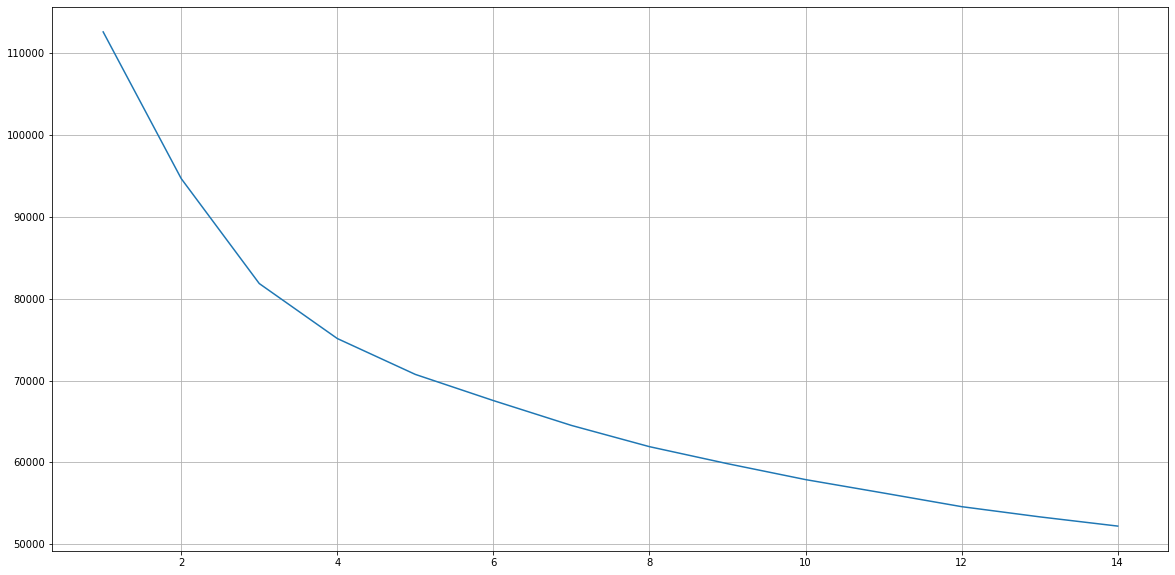

In [86]:
plt.plot(range(1,15), wss)
plt.grid()
plt.show()

In [87]:
#Ideal No of clusters is 3
k_means6 = KMeans(n_clusters = 3,random_state=1)
k_means6.fit(scaled_df)
labels_3 = k_means6.labels_
labels_3

array([1, 1, 1, ..., 2, 0, 1])

In [88]:
df['Kmeans_clusters'] = labels_3
df.head()

,Tenure,CC_Contacted_LY,Account_user_count,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,rev_growth_yoy,coupon_used_for_payment,Kmeans_clusters
0,4.0,6.0,3.0,9.0,11.0,1.0,5.0,160.0,11,1,1
1,0.0,8.0,4.0,7.0,15.0,0.0,0.0,121.0,15,0,1
2,0.0,30.0,4.0,6.0,14.0,0.0,3.0,152.0,14,0,1
3,0.0,15.0,4.0,8.0,23.0,0.0,3.0,134.0,23,0,2
4,0.0,12.0,3.0,3.0,11.0,1.0,3.0,130.0,11,1,1


In [89]:
df.to_csv("3 new no After clustering.csv")